In [ ]:
x = [45.4, 32.6, 37.9, 36.4, 53.1, 75.0, 39.0, 30.3, 69.2, 52, 32, 48.2, 98.1, 140, 130, 57.9, 52.5, 35.7, 62.5, 27, 123, 48.4, 50.3, 45]
y = [13.2, 11.0, 4.9, 12.7, 17.2, 26.4, 12.0, 2.9, 12.99, 10.4, 9, 13.3, 31.5, 84.3, 37.8, 24.1, 22.5, 13.2, 15.17, 7, 63.39, 14.5, 9.6, 7.8]

Text(0, 0.5, 'y, mln rub')

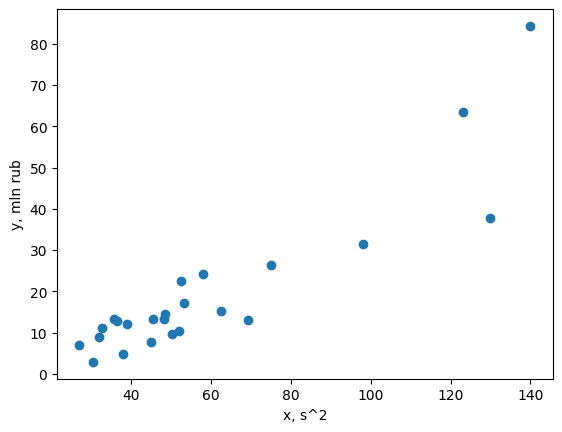

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.xlabel('x, s^2')
plt.ylabel('y, mln rub')

In [ ]:
# predic synonim
# x - argument (features)
# w - weights (parameters)
def model(x, w0, w1 ):
  return w0 * 1 + w1 * x

In [ ]:
w0 = 0.1
w1 = 0.5
y_pred = []
for xx in x:
  y_pred.append(model(xx, w0, w1))

In [ ]:
w0 = 1.0
w1 = 0.2
y_pred_2 = []
for xx in x:
  y_pred_2.append(model(xx, w0, w1))

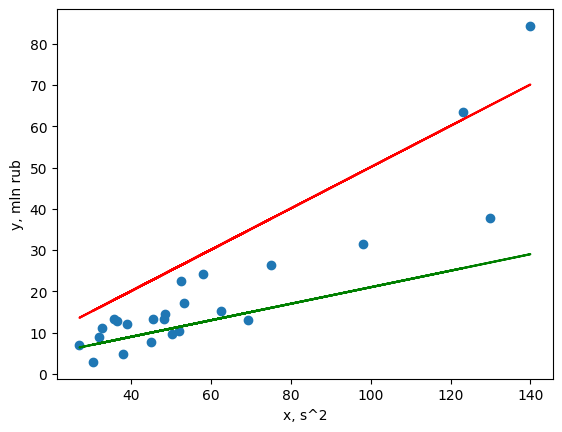

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.xlabel('x, s^2')
plt.ylabel('y, mln rub')
plt.plot(x, y_pred, color='r')
plt.plot(x, y_pred_2, color='g')

In [ ]:
# MSE
# Mean
# Squared
# Error
def loss(y, y_pred):
  mse = 0
  m = len(y)
  for yy, yy_pred in zip(y, y_pred):
    mse += (yy - yy_pred)**2
  mse = mse / m
  return mse

In [ ]:
print('w0 = 0.1, w1 = 0.5 :: ', loss(y, y_pred))
print('w0 = 1.0, w1 = 0.2 :: ', loss(y, y_pred_2))


w0 = 0.1, w1 = 0.5 ::  160.577525
w0 = 1.0, w1 = 0.2 ::  219.2099625


In [ ]:
# Brute force
ww0 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
ww1 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
ll = []
for w0 in ww0:
  for w1 in ww1:
    y_pred = []
    for xx in x:
      y_pred.append(model(xx, w0, w1))
    print(w0, ' :: ', w1, ' :: ', loss(y, y_pred))
    ll.append(loss(y, y_pred))

0.1  ::  0.1  ::  436.318325
0.1  ::  0.2  ::  232.66121249999995
0.1  ::  0.3  ::  118.8187083333333
0.1  ::  0.4  ::  94.79081250000003
0.1  ::  0.5  ::  160.577525
0.1  ::  0.6  ::  316.17884583333336
0.1  ::  0.7  ::  561.594775
0.1  ::  0.8  ::  896.8253125
0.1  ::  0.9  ::  1321.870458333333
0.2  ::  0.1  ::  433.5591583333334
0.2  ::  0.2  ::  231.08662916666663
0.2  ::  0.3  ::  118.42870833333332
0.2  ::  0.4  ::  95.58539583333332
0.2  ::  0.5  ::  162.55669166666664
0.2  ::  0.6  ::  319.34259583333335
0.2  ::  0.7  ::  565.9431083333333
0.2  ::  0.8  ::  902.358229166667
0.2  ::  0.9  ::  1328.5879583333335
0.3  ::  0.1  ::  430.8199916666667
0.3  ::  0.2  ::  229.53204583333329
0.3  ::  0.3  ::  118.05870833333337
0.3  ::  0.4  ::  96.39997916666668
0.3  ::  0.5  ::  164.55585833333333
0.3  ::  0.6  ::  322.52634583333327
0.3  ::  0.7  ::  570.3114416666665
0.3  ::  0.8  ::  907.9111458333332
0.3  ::  0.9  ::  1335.3254583333332
0.4  ::  0.1  ::  428.10082499999993
0.4  ::

In [ ]:
plt.plot(ww0, ll)
plt.xlabel('w')
plt.ylabel('loss')
plt.show()

SyntaxError: invalid decimal literal (<ipython-input-72-9abb1d2e9559>, line 3)

In [ ]:
def grad_numeric(w0, w1, x, y):
  delta = 0.000001
  y_pred_1 = []
  for xx in x:
    y_pred_1.append(model(xx, w0, w1))
  y_pred_2 = []
  for xx in x:
    y_pred_2.append(model(xx, w0 + delta, w1))
  y_pred_3 = []
  for xx in x:
    y_pred_3.append(model(xx, w0, w1 + delta))


  l1 = loss(y, y_pred_1)
  l2 = loss(y, y_pred_2)
  grad_LW0 = (l2 - l1) / delta
  l3 = loss(y, y_pred_3)
  grad_LW1 = (l3 - l1) / delta
  return grad_LW0, grad_LW1

In [ ]:
def grad_analytic(w0, w1, x, y):
  y_pred = []
  for xx in x:
    y_pred.append(model(xx, w0, w1))

  grad_LW0 = 0
  grad_LW1 = 0
  for yy, yy_pred, xx in zip(y, y_pred, x):
    grad_LW0 += -(yy - yy_pred) * 1
    grad_LW1 += -(yy - yy_pred) * xx
  grad_LW0 = 2.0 / len(y_pred) * grad_LW0
  grad_LW1 = 2.0 / len(y_pred) * grad_LW1
  return grad_LW0, grad_LW1

In [ ]:
w0 = 0.7
w1 = 0.7
print("Numeric calc of grad :: ", grad_numeric(w0, w1, x, y))
print("Analytic calc of grad :: ", grad_analytic(w0, w1, x, y))

Numeric calc of grad ::  (44.58333398815739, 2974.3118238911848)
Analytic calc of grad ::  (44.58333333333333, 2974.307333333333)


In [ ]:
nstep = 10000
learning_rate = 0.0001 # gradient step, learning_rate (lr)
w0 = 1.2
w1 = 1.2
losses = []

for i in range(nstep):
  # Gradient calculation
  grad_LW0, grad_LW1 = grad_analytic(w0, w1, x, y)
  # Update weights
  w0 = w0 - learning_rate * grad_LW0
  w1 = w1 - learning_rate * grad_LW1

  # Calculate the prediction
  y_pred = []
  for xx in x:
    y_pred.append(model(xx, w0, w1))
  l = loss(y, y_pred)
  losses.append(l)
  print('NSTEP :: ', i, 'LOSS :: ', l, 'GRAD :: ', grad_LW0, grad_LW1)

Streaming output truncated to the last 5000 lines.
NSTEP ::  5000 LOSS ::  85.6107999360464 GRAD ::  4.473547893501689 -0.05900541742131319
NSTEP ::  5001 LOSS ::  85.60879854375183 GRAD ::  4.4733521522635264 -0.05900283562375345
NSTEP ::  5002 LOSS ::  85.60679732659622 GRAD ::  4.473156419590069 -0.05900025393984738
NSTEP ::  5003 LOSS ::  85.60479628456439 GRAD ::  4.472960695480945 -0.05899767236840129
NSTEP ::  5004 LOSS ::  85.60279541764093 GRAD ::  4.472764979935779 -0.058995090910277284
NSTEP ::  5005 LOSS ::  85.6007947258105 GRAD ::  4.4725692729542015 -0.058992509564689044
NSTEP ::  5006 LOSS ::  85.59879420905786 GRAD ::  4.472373574535827 -0.058989928332474996
NSTEP ::  5007 LOSS ::  85.59679386736758 GRAD ::  4.472177884680294 -0.05898734721285355
NSTEP ::  5008 LOSS ::  85.59479370072445 GRAD ::  4.471982203387219 -0.058984766205985764
NSTEP ::  5009 LOSS ::  85.59279370911311 GRAD ::  4.4717865306562175 -0.058982185313169566
NSTEP ::  5010 LOSS ::  85.5907938925182 GR

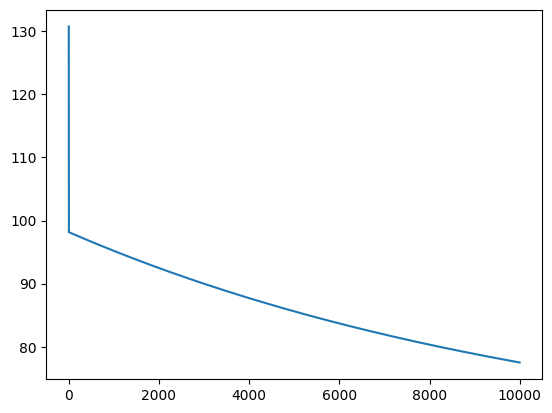

In [ ]:
plt.plot(losses)
plt.show()

In [ ]:
y_pred = []
for xx in x:
  y_pred.append(model(xx, w0, w1))

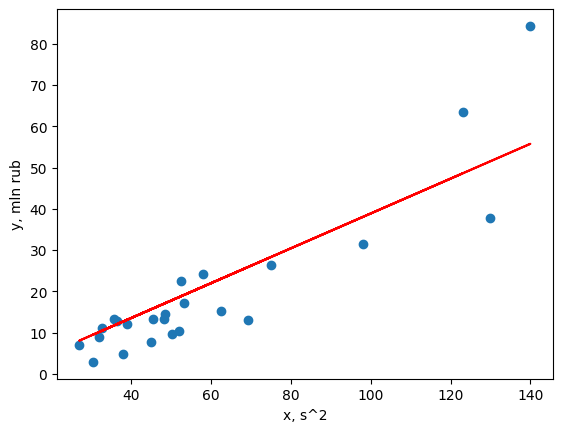

In [ ]:
plt.scatter(x, y)
plt.xlabel('x, s^2')
plt.ylabel('y, mln rub')
plt.plot(x, y_pred, color='r')

In [ ]:
# 80% goes to train dataset
# 20% goes to test dataset
# ~ 20 records
# ~ 16 to train
# ~ 4 to test
x_train = x[:16]
y_train = y[:16]

x_test = x[16:]
y_test = y[16:]

In [ ]:
nstep = 100
learning_rate = 0.00001 # gradient step, learning_rate (lr)
w = 1.2
losses = []

for i in range(nstep):
  # Gradient calculation
  grad = grad_analytic(w, x_train, y_train)
  # Update weights
  w = w - learning_rate * grad

  # Calculate the prediction
  y_pred = []
  for xx in x_train:
    y_pred.append(model(xx, w))
  l = loss(y_train, y_pred)
  losses.append(l)
  print('NSTEP :: ', i, 'LOSS :: ', l, 'GRAD :: ', grad)
print('Optimal weight :: ', w)

NSTEP ::  0 LOSS ::  2803.8257191032126 GRAD ::  7984.5625
NSTEP ::  1 LOSS ::  2308.3155257616204 GRAD ::  7215.201097486719
NSTEP ::  2 LOSS ::  1903.6956396927987 GRAD ::  6519.972368827165
NSTEP ::  3 LOSS ::  1573.2942586469726 GRAD ::  5891.733177759563
NSTEP ::  4 LOSS ::  1303.4976511257564 GRAD ::  5324.02867286338
NSTEP ::  5 LOSS ::  1083.1892214226093 GRAD ::  4811.025967107731
NSTEP ::  6 LOSS ::  903.2914656865595 GRAD ::  4347.454207780677
NSTEP ::  7 LOSS ::  756.3919459429213 GRAD ::  3928.550421047164
NSTEP ::  8 LOSS ::  636.4378708483245 GRAD ::  3550.0105747148214
NSTEP ::  9 LOSS ::  538.4866988028942 GRAD ::  3207.94535640141
NSTEP ::  10 LOSS ::  458.50248736608216 GRAD ::  2898.840212746143
NSTEP ::  11 LOSS ::  393.18959783576105 GRAD ::  2619.519239087252
NSTEP ::  12 LOSS ::  339.85690301798564 GRAD ::  2367.112548589846
NSTEP ::  13 LOSS ::  296.30690305656157 GRAD ::  2139.026785557761
NSTEP ::  14 LOSS ::  260.74518049368976 GRAD ::  1932.9184799680443
NS

In [ ]:
w_opt = 0.3713815949886466
y_pred = []
for xx in x_test:
  y_pred.append(model(xx, w))
print('LOSS on testing dataset :: ', loss(y_test, y_pred))

LOSS on testing dataset ::  71.30616641736387
